In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import json
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolsrcValidator

In [6]:
total_df = pd.read_csv("../data/for_total.csv")
total_df

,previouse_data,data
0,3.06,3.098589
1,3.06,3.099301
2,3.16,3.100924
3,3.16,3.100118
4,3.17,3.092940
...,...,...
1400,3.05,3.070627
1401,3.05,3.069997
1402,3.05,3.070022
1403,3.09,3.072303


In [14]:
WANT_DAY = 10 # 최근 n일 간(데이터는 주작)
day_length = int(np.floor(len(total_df)/WANT_DAY))
day_length

140

In [30]:
max_len = day_length
pre_data = total_df["previouse_data"]
# real_data = total_df["data"]
A_counts = []
B_counts = []
C_counts = []
for i in range(WANT_DAY):
    # 조각조각 탐색 
    temp_list = pre_data[:max_len]
    # real_data[:max_len+day_length]
    
    A_cnt = len([num for num in temp_list if 2.9 <= num <= 3.1])            # A
    B_cnt = len([num for num in temp_list if 2.8 <= num <= 3.2]) - A_cnt    # B
    C_cnt = len(temp_list) - (A_cnt + B_cnt)                                # C
    
    # max_len += day_length
    # print(A_cnt, B_cnt, C_cnt)
    # print()
    
    A_counts.append(A_cnt)
    B_counts.append(B_cnt)
    C_counts.append(C_cnt)
    
    max_len += day_length

# Create a cumulative sum for each count
A_cumulative = [sum(A_counts[:i+1]) for i in range(len(A_counts))]
B_cumulative = [sum(B_counts[:i+1]) for i in range(len(B_counts))]
C_cumulative = [sum(C_counts[:i+1]) for i in range(len(C_counts))]

# Create the Plotly graph
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, WANT_DAY + 1)), y=A_cumulative, mode='lines+markers', name='A Count'))
fig.add_trace(go.Scatter(x=list(range(1, WANT_DAY + 1)), y=B_cumulative, mode='lines+markers', name='B Count'))
fig.add_trace(go.Scatter(x=list(range(1, WANT_DAY + 1)), y=C_cumulative, mode='lines+markers', name='C Count'))

fig.update_layout(
    title='Cumulative Counts of A, B, C',
    xaxis_title='Day',
    yaxis_title='Cumulative Count',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=600, height=400
)
    


In [45]:
WANT_DAY = 40 # 최근 n일 간(데이터는 주작)
day_length = int(np.floor(len(total_df)/WANT_DAY))
day_length
max_len = day_length
pre_data = total_df["previouse_data"]
# real_data = total_df["data"]
A_counts = []
B_counts = []
C_counts = []
for i in range(WANT_DAY):
    # 조각조각 탐색 
    temp_list = pre_data[:max_len]
    # real_data[:max_len+day_length]
    
    A_cnt = len([num for num in temp_list if 2.9 <= num <= 3.1])            # A
    B_cnt = len([num for num in temp_list if 2.8 <= num <= 3.2]) - A_cnt    # B
    C_cnt = len(temp_list) - (A_cnt + B_cnt)                                # C
    
    # max_len += day_length
    # print(A_cnt, B_cnt, C_cnt)
    # print()
    
    A_counts.append(A_cnt)
    B_counts.append(B_cnt)
    C_counts.append(C_cnt)
    
    max_len += day_length

x_label = list(range(day_length))
# Create the stacked bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_label,
    y=A_counts,
    name='A 2.9~3.1',
    marker_color='#21A675',
    marker_line_width=0  # Remove border
))

fig.add_trace(go.Bar(
    x=x_label,
    y=B_counts,
    name='B 2.8~3.2',
    marker_color='#F28705',
    marker_line_width=0  # Remove border
))

fig.add_trace(go.Bar(
    x=x_label,
    y=C_counts,
    name='C Other',
    marker_color='#F23827',
    marker_line_width=0  # Remove border
))

# Update layout for stacked bars
fig.update_layout(
    barmode='stack', 
    title='야야야', 
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)', 
    font=dict(color='black'),
    xaxis=dict(title='Categories', showgrid=False, zeroline=False),
    yaxis=dict(title='생산량', showgrid=False, zeroline=False),
    legend=dict(bgcolor='rgba(0,0,0,0)')
)

# Show the plot
fig.show()


# Diverging Bar Chart (발산 막대 차트)

In [81]:
from datetime import datetime, timedelta

# 현재 날짜와 시각을 가져옴
now = datetime.now()

# # 오늘을 포함해서 14일 동안의 월,일을 출력
# for i in range(14):
#     day = now + timedelta(days=-i)
#     print(day.strftime("%m-%d"))
start_day = now.strftime("%m/%d")
end_day = (now + timedelta(days=-7)).strftime("%m/%d")
print(start_day,"\n" ,end_day)

06/07 
 05/31


In [74]:
'''
    #21A675 녹색
    #F28705 주황색
    #F23827 빨간색
    '''

import plotly.graph_objects as go  # Plotly 그래프 객체를 불러옴

# Sample data
categories = ['C등급', 'B등급', 'A등급']  # y축에 표시될 카테고리
counts = [50, 30, 5]  # 각 카테고리에 해당하는 x축 값
colors = ['#F23827', '#F28705', '#21A675']  # 막대 색상 설정 (C, B, A 순서)
names = ['~2.8g|3.2g ~', '2.8 ~ 3.2g', '2.9 ~ 3.1g']  # 범례에 표시될 이름

# diverging_chartJSON
diverging_fig = go.Figure()  # diverging_Figure 객체를 생성

# 막대 그래프 추가
for count, category, color, name in zip(counts, categories, colors, names):
    diverging_fig.add_trace(go.Bar(
        x=[count],
        y=[category],
        orientation='h',  # 수평 막대 그래프로 설정
        marker=dict(color=color),  # 막대 색상 설정
        text=[count],  # 각 막대에 표시될 텍스트
        textposition='auto',  # 텍스트 위치 자동 설정
        name=name  # 범례에 표시될 이름
    ))

# 레이아웃 업데이트
diverging_fig.update_layout(
    title=dict(
        text='일일 생산 고무링 품질 수준',  # 그래프 제목 설정
        font=dict(size=24, family='Arial', color='black')  # 제목 글꼴 크기 및 색상 설정
    ),
    xaxis=dict(title='Count', showgrid=False),  # x축 제목 설정 및 그리드 라인 제거
    yaxis=dict(title='', showgrid=False),  # y축 제목 제거 및 그리드 라인 제거
    barmode='stack',  # 막대 그래프 모드 설정 (스택 모드)
    margin=dict(l=0, r=0, t=50, b=0),  # 그래프의 여백을 최소화
    paper_bgcolor='rgba(0,0,0,0)',  # 투명 배경 설정
    plot_bgcolor='rgba(0,0,0,0)',  # 투명 플롯 영역 설정
    font=dict(color='black'),  # 글꼴 색상 설정
    showlegend=True,  # 범례 표시 설정
    legend=dict(
        x=0.85,  # 범례의 x 좌표 (그래프의 오른쪽에 위치하도록 설정)
        y=0.95,  # 범례의 y 좌표 (그래프의 상단에 위치하도록 설정)
        bgcolor='rgba(255,255,255,0.8)',  # 범례 배경 색상 (반투명 흰색)
        # bordercolor='black',  # 범례 테두리 색상
        # borderwidth=1,  # 범례 테두리 두께
        font=dict(
            size=12,  # 범례 글꼴 크기
            color='black'  # 범례 글꼴 색상
        )
    )
)

# 그래프 보여주기
diverging_fig.show()


# 트리맵

In [49]:
import plotly.graph_objects as go

# Sample data
labels = ['A', 'B', 'C']
parents = ['', '', '']
values = [50, 30, 5]

fig = go.Figure(go.Treemap(
    labels = labels,
    parents = parents,
    values = values,
    marker_colors = ['green', 'yellow', 'red']
))

fig.update_layout(
    title='Quality Grades'
)

fig.show()


# 작은 그래프 여러개?

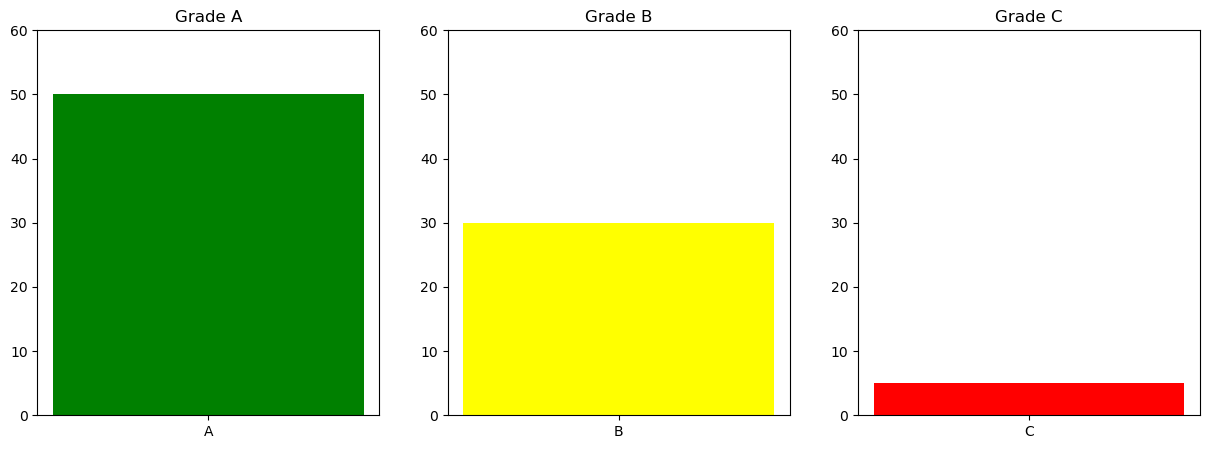

In [50]:
import matplotlib.pyplot as plt

# Sample data
grades = ['A', 'B', 'C']
counts = [50, 30, 5]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, grade, count in zip(axes, grades, counts):
    ax.bar(grade, count, color='green' if grade == 'A' else 'yellow' if grade == 'B' else 'red')
    ax.set_title(f'Grade {grade}')
    ax.set_ylim(0, 60)

plt.show()
